# importer les librairies

In [70]:
import pandas as pd #manipulation et l'analyse de données
import numpy as np #manipuler les donner sous forme de matrice
import matplotlib.pyplot as plt #graphique

## Recuperer les datas csv

In [71]:
# charger les donnees a partir du fichier
data = pd.read_csv('Salary_Data.csv')

In [72]:
#voir les 5 premieres instances de données
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [73]:
# Voir les informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Preparer les donnees

In [74]:
# Selectionner les colonnes "YearExperience" comme variables d'entrée
# et la collenne "Salary" commen variable cible
X = data[['YearsExperience']]
y = data['Salary']

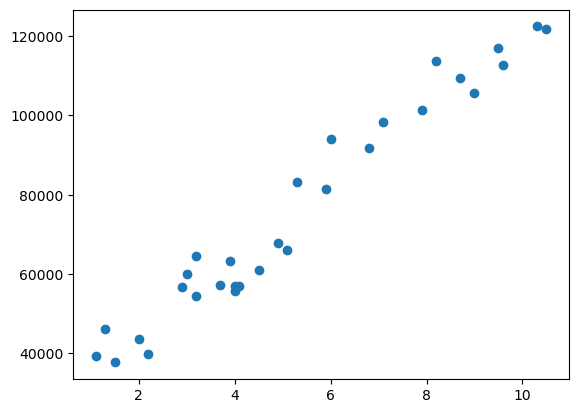

In [75]:
# placer les points sur un graphique
plt.scatter(X,y)

In [76]:
# Separer la dataset en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0) 

# Construire et entrainer le model

In [77]:
#Importer la librairie linearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() #Instancier

In [78]:
regressor.fit(X_train,y_train) # Entrainement = produire l'equation lineaire

LinearRegression()

In [79]:
#retrouver les coefficients et l'ordonnée à l'origine
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.192244031176


Text(0, 0.5, 'Salaire')

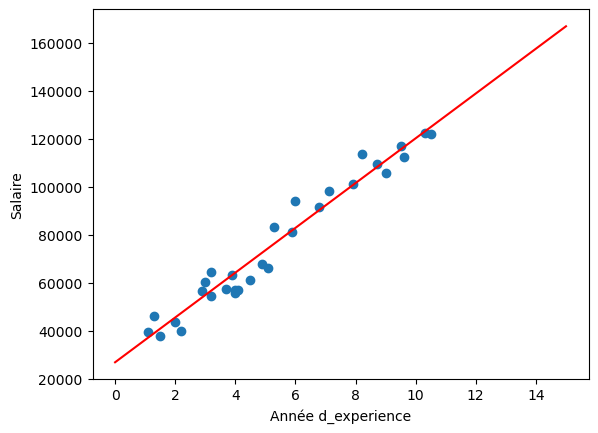

In [80]:
# Ajouter sur le graphique la droite
ordonne = np.linspace(0,15,1000)
plt.scatter(X,y)
plt.plot(ordonne,regressor.coef_[0]*ordonne+regressor.intercept_,color='r')
plt.xlabel('Année d_experience')
plt.ylabel('Salaire')

# Evaluation

on va maintenant evaluer le model pour voir si il est efficace ou non

In [81]:
# Prediction sur la base test
y_predict = regressor.predict(X_test)

In [82]:
# Metrique
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R²:', metrics.r2_score(y_test,y_predict))

MAE: 3426.42693743071
MSE: 21026037.329511303
RMSE: 4585.415720467589
R²: 0.9749154407708353


In [83]:
NewData = [[5],[4]]
y_new = regressor.predict(NewData)
y_new

C:\Users\Dr BERNARD\.conda\envs\ml\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([73545.90445964, 64199.96201652])